In [232]:
#=

#=
intent
take an array of durations of seclusion
count the actual distribution of durations
see this curve as being a probability mass function based on two other curves

an exponent which informs reviews, which is when the team feels most sure
    - the ones after teh medical reviews
    -- thought to represent the two hourly review after four hourly medical attendance
    --- with agreement to start two hours of testing which can be succesful
a decay function between those
=#

#s1 config



function get_granularity()
    limit           = get_limit()
    width_of_hists  = get_width_of_hists()
    granularity::Int= (limit*(24*60))/width_of_hists
    println("granularity:\t\t\t\t\t", granularity)
    return granularity
end







#s2 in out read draw





#s3 model




    
function get_xs()
    limit               = get_limit()
    minutes             = limit*24*60
    width_of_hists      = get_width_of_hists()
    n_hists::Int        = minutes/width_of_hists
    xs                  = [float(x) for x in collect(1:n_hists)]
    return xs
end







function my_poisson(k, labda)    
    probability = (labda^k)*(ℯ^(-labda))/factorial(big(k))
    return probability
end



function dist_poisson(xs, labda)
    xs              = [trunc(Int64,x) for x in xs]
    ys              = [my_poisson(x, labda) for x in xs]
    return ys
end





function harry_main()
    
end

unanalysed, initial, harry_graph = harry_main();
     =#

In [233]:
#=

# some spare demos


function demo_normal()
    durations           = read_durations()
    total               = length(durations)
    limit               = get_limit()
    limited             = [d for d in durations if d<=limit]
    cumulative_count    = length(limited)
    cumulative_fraction = cumulative_count/total
    
    d             = Normal()
    Random.seed!(123) # Setting the seed
    raw_x         = rand(d, cumulative_count)
    max_raw_x     = maximum(raw_x)
    limit         = get_limit()
    x             = [(0.5*max_raw_x)+limit*(rx/max_raw_x) for rx in raw_x]
    scatterg      = scatter(x,legend=false,alpha=0.25)
    histog        = histogram(x,legend=false)
    graphs        = plot(scatterg, histog, layout=(1,2))
    return graphs
end

#normal_graphs = demo_normal()

function demo_poisson()
    durations           = read_durations()
    total               = length(durations)
    limit               = get_limit()
    limited             = [d for d in durations if d<=limit]
    cumulative_count    = length(limited)
    cumulative_fraction = cumulative_count/total
    
    d             = Poisson(4)
    Random.seed!(123) # Setting the seed
    raw_x         = rand(d, cumulative_count)
    max_raw_x     = maximum(raw_x)
    limit         = get_limit()
    x             = [limit*(rx/max_raw_x) for rx in raw_x]
    scatterg      = scatter(x,alpha=0.25,legend=false)
    histog        = histogram(x,legend=false)
    graphs        = plot(scatterg, histog, layout=(1,2))
    return graphs
end

#poisson_graphs = demo_poisson()

function demo_uniform()
    d             = Uniform()
    Random.seed!(123) # Setting the seed
    raw_x         = rand(d, 100)
    max_raw_x     = maximum(raw_x)
    limit         = get_limit()
    x             = [limit*(rx/max_raw_x) for rx in raw_x]
    scatterg      = scatter(x,alpha=0.25,legend=false)
    histog        = histogram(x,legend=false)
    graphs        = plot(scatterg, histog, layout=(1,2))
    return graphs
end

#graphs = demo_uniform()

# some live demos

function demo_exponential_histogram()
    
    durations           = read_durations()
    total               = length(durations)
    limit               = get_limit()
    limited             = [d for d in durations if d<=limit]
    cumulative_count    = length(limited)
    
    
    d             = Exponential()
    Random.seed!(123) # Setting the seed
    raw_ys        = rand(d, cumulative_count)
    max_raw_y     = maximum(raw_ys)
    limit         = get_limit()
    ys            = [limit*(ry/max_raw_y) for ry in raw_ys]
    scatterg      = scatter(ys,alpha=0.25,legend=false)
    histog        = histogram(ys,legend=false)
    graphs        = plot(scatterg, histog, layout=(1,2), title="exponential distribution")
    println("\nany exponential graph has a measure called beta")
    println("we can measure it and use it to draw a new graph\n")
    return graphs
end
exponential_graphs = demo_exponential_histogram()



display(exponential_graphs); display(exponential_probability_distribution_function)



#s7 tests



=#

In [234]:
#=

using Plots


    
function test_put_dense_between_sparse()
    limit      = get_limit()
    anomia     = get_anomia()
    density    = 10
    sparse_xs  = 1/12:limit/density:limit
    sparse_ys  = [x^2 for x in sparse_xs]
    sparse     = [sparse_xs, sparse_ys] 
    dense      = put_dense_between_sparse(sparse, anomia)
    sparseg    = scatter(sparse[1],sparse[2], label="sparse")
    denseg     = scatter!(dense[1],dense[2], label="dense", alpha=0.5)
end

test_put_dense_between_sparse()=#

In [235]:
#=

function trace_whole_function()
    limited                        = count_limited()
    count_durs                     = collect(countmap(limited))
    durs                           = [x[1] for x in count_durs]
    freqs                          = [x[2] for x in count_durs]
        
    even_odd_review_durations      = get_even_odd_review_durations()
    even_reviews_durations         = [round(d; digits = 4) for d in even_odd_review_durations[1]]
    odd_reviews_durations          = [round(d; digits = 4) for d in even_odd_review_durations[2]]
    
    even_durs           = [x[1] for x in count_durs if in(round(x[1], digits = 4), even_reviews_durations)]
    even_freqs          = [x[2] for x in count_durs if in(round(x[1], digits = 4), even_reviews_durations)]
    odd_durs            = [x[1] for x in count_durs if in(round(x[1], digits = 4), odd_reviews_durations)]
    odd_freqs           = [x[2] for x in count_durs if in(round(x[1], digits = 4), odd_reviews_durations)]
    
    this_many_reviews   = length(even_freqs)
    
    θ                   = params(fit_mle(Exponential, even_freqs))[1]
    
    granularity         = get_granularity()
    limited             = count_limited()
    count_durs          = collect(countmap(limited))
    freqs               = [x[2] for x in count_durs]
    max_y               = maximum(freqs)
    
    limit               = get_limit()
    interpolated_exp    = Exponential(θ)
    noisy_exp           = rand(interpolated_exp, this_many_reviews)
    max_noisy           = maximum(noisy_exp)
    rand_exponential_ys = [y[2] for y in enumerate(reverse(sort(noisy_exp))) if y[1]<this_many_reviews]
    
    review_xs           = []
    for this_review in 1:this_many_reviews-1
        push!(review_xs,  this_review/12)
    end
    
    hist_freqs          = draw_hist_freqs(limited)
    overlaid            = scatter!(review_xs, rand_exponential_ys, 
                            #xlims=(0,limit), 
                            #ylims=(0,max_y*1.5), 
                            legend=false, alpha=1.0)
    
    #=
    relevant_review     = (review_xs[1],rand_exponential_ys[1])
    relevant_x          = relevant_review[1]
    relevant_y          = relevant_review[2]
    
    density             = 1
    underlaid_xs        = collect(0:1/(this_many_reviews*density):limit)
    underlaid_ys        = [relevant_y - x for x in underlaid_xs]
    underlaid           = scatter!(underlaid_xs, underlaid_ys)
    =#
    anomia              = get_anomia()
    dense               = put_dense_between_sparse([even_durs, even_freqs], anomia)
    dense_xs            = dense[1]
    dense_ys            = dense[2]
    underlaid           = scatter!(dense_xs, dense_ys)
    return underlaid
end

overlaid = trace_whole_function()

display(overlaid)=#


In [236]:
#=
function old_trace_whole_function()
    limited                        = count_limited()
    count_durs                     = collect(countmap(limited))
    durs                           = [x[1] for x in count_durs]
    freqs                          = [x[2] for x in count_durs]
        
    even_odd_review_durations      = get_even_odd_review_durations()
    even_reviews_durations         = [round(d; digits = 4) for d in even_odd_review_durations[1]]
    odd_reviews_durations          = [round(d; digits = 4) for d in even_odd_review_durations[2]]
    
    even_durs           = [x[1] for x in count_durs if in(round(x[1], digits = 4), even_reviews_durations)]
    even_freqs          = [x[2] for x in count_durs if in(round(x[1], digits = 4), even_reviews_durations)]
    odd_durs            = [x[1] for x in count_durs if in(round(x[1], digits = 4), odd_reviews_durations)]
    odd_freqs           = [x[2] for x in count_durs if in(round(x[1], digits = 4), odd_reviews_durations)]
    
    this_many_reviews   = length(even_freqs)
    
    θ                   = params(fit_mle(Exponential, even_freqs))[1]
    
    granularity         = get_granularity()
    limited             = count_limited()
    count_durs          = collect(countmap(limited))
    freqs               = [x[2] for x in count_durs]
    max_y               = maximum(freqs)
    
    limit               = get_limit()
    interpolated_exp    = Exponential(θ)
    noisy_exp           = rand(interpolated_exp, this_many_reviews)
    max_noisy           = maximum(noisy_exp)
    rand_exponential_ys = [y[2] for y in enumerate(reverse(sort(noisy_exp))) if y[1]<this_many_reviews]
    
    review_xs           = []
    for this_review in 1:this_many_reviews-1
        push!(review_xs,  this_review/12)
    end
    
    hist_freqs          = draw_hist_freqs(limited)
    overlaid            = scatter!(review_xs, rand_exponential_ys, 
                            xlims=(0,limit), 
                            ylims=(0,max_y*1.5), 
                            legend=false, alpha=1.0)
    
    
    relevant_review     = (review_xs[1],rand_exponential_ys[1])
    relevant_x          = relevant_review[1]
    relevant_y          = relevant_review[2]
    
    density             = 1
    underlaid_xs        = collect(0:1/(this_many_reviews*density):limit)
    underlaid_ys        = [relevant_y - x for x in underlaid_xs]
    underlaid           = scatter!(underlaid_xs, underlaid_ys)
            
    return underlaid
end

overlaid = old_trace_whole_function()

display(overlaid)
=#

In [266]:
#s0 libs

using Combinatorics
using DelimitedFiles
using Distributions
using Plots
using Random
using StatsBase
using Test

#s1 getters

function get_anomia()
    anomia = 12
    return anomia
end

function get_limit()
    limit::Float64          = 1.5 # days, conventionally a whole number, or round fractions like 0.5
    return limit
end

function get_width_of_hists()
    width_of_hists::Int64   = 1
    return width_of_hists
end


function get_width_of_two_hr()
    width_of_two_hr::Int64  = 120
    return width_of_two_hr
end

#s2 readers

function read_durations()
    output_matrix                   = readdlm("durations.txt", ' ', Float64, '\n')
    durations                       = output_matrix[1,:]
    return durations
end

#s3 counters

function count_cumulative_fraction()
    limited::Vector{Float64}    = count_limited()
    durations::Vector{Float64}  = read_durations()
    total::Int64                = length(durations)
    cumulative_fraction::Float64= length(limited)/total
    return cumulative_fraction
end

function get_granularity()
    limit           = get_limit()
    width_of_hists  = get_width_of_hists()
    granularity::Int= (limit*(24*60))/width_of_hists
    println("granularity:\t\t\t\t\t", granularity)
    return granularity
end

function get_even_odd_review_durations()
    limit::Float64              = get_limit()
    minutes::Int64              = limit*24*60
    
    width_of_two_hr::Int64      = get_width_of_two_hr()
    n_two_hr_blocks::Float64    = minutes/width_of_two_hr
    review_range                = collect(1:n_two_hr_blocks)
    even_hours                  = [r*2 for r in review_range]
    odd_hours                   = [h-1 for h in even_hours]
    
    even_hours_in_days          = [d/24 for d in even_hours]
    odd_hours_in_days           = [d/24 for d in odd_hours]
    
    even_odd_review_durations   = even_hours_in_days, odd_hours_in_days 
    return even_odd_review_durations
end

function interpolate_exponential(θ, this_many_reviews)
    
    println("this many even reviews:\t", this_many_reviews)
    Random.seed!(4579) # Setting the seed if you want similar rands each time - not my cup of tea    
    
    granularity         = get_granularity()
    
    
    limited             = count_limited()
    count_durs          = collect(countmap(limited))
    freqs               = [x[2] for x in count_durs]
    max_y               = maximum(freqs)
    
    limit               = get_limit()
    interpolated_exp    = Exponential(θ)
    noisy_exp           = rand(interpolated_exp, this_many_reviews)
    max_noisy           = maximum(noisy_exp)
    approximate_ys      = [y[2] for y in enumerate(reverse(sort(noisy_exp))) if y[1]<this_many_reviews]
    
    println("only using one random sample to estimate review values - please do it 20 times")
    
    review_xs           = []
    for this_review in 1:this_many_reviews-1
        push!(review_xs,  this_review/12)
    end
    
    return review_xs, approximate_ys
end

function count_limited()
    durations::Vector{Float64}  = read_durations()
    limit::Float64              = get_limit()
    total::Int64                = length(durations)
    limited::Vector{Float64}    = [d for d in durations if d<=limit]
    return limited
end

function count_total()
    durations::Vector{Float64}  = read_durations()
    total::Int64                = length(durations)
    return total
end

#s4 drawers

function draw_cont_scat_freqs()
    limited::Vector{Float64}                = count_limited()
    count_durs::Vector{Pair{Float64, Int64}}= collect(countmap(limited))
    durs::Vector{Float64}                   = [x[1] for x in count_durs]
    freqs::Vector{Float64}                  = [x[2] for x in count_durs]
    cont_scat_freqs                         = scatter(durs, freqs, alpha=0.25,
                                              xlims = (0,maximum(durs)+0.1), ylims = (0,maximum(freqs)+25), legend=false)#, 
                                              #label="raw by length", legend=:topright)
    return cont_scat_freqs
end

function draw_hist_freqs()
    limit::Float64                          = get_limit()
    limited::Vector{Float64}                = count_limited()
    count_durs::Vector{Pair{Float64, Int64}}= collect(countmap(limited))
    durs::Vector{Float64}                   = [x[1] for x in count_durs]
    freqs::Vector{Float64}                  = [x[2] for x in count_durs]
    
    width_of_hists::Int64       = get_width_of_hists()
    minutes::Int64              = limit*24*60
    n_hists::Int64              = minutes/width_of_hists
    hist_freqs                  = histogram(limited, bins=n_hists, alpha=0.25, 
                                xlims = (0,maximum(durs)+0.1), ylims = (0,maximum(freqs)+25), legend=false)#,
                                #label="auto bar chart", legend=:topright)
    return hist_freqs
end

function draw_keith_hist()
    limit::Float64              = get_limit()
    limited::Vector{Float64}    = count_limited()
    width_of_hists::Int64       = get_width_of_hists()
    minutes_in_limit::Int64     = limit*24*60
    n_hists_in_limit::Int64     = minutes_in_limit/width_of_hists
    width_of_a_hist_in_days::Float64        = width_of_hists / (24*60) 
    count_durs::Vector{Pair{Float64, Int64}}= collect(countmap(limited))
    durs::Vector{Float64}                   = [x[1] for x in count_durs]
    freqs::Vector{Float64}                  = [x[2] for x in count_durs]
    number_of_counts                        = length(durs)
    @assert number_of_counts == length(durs) == length(freqs)
    
    lumped_freqs = []
    lumped_durs  = []
    
    this_hist_start = 0.0
    for i in 1:n_hists_in_limit
        this_hist_end           = this_hist_start + width_of_a_hist_in_days
        all_these_frequencies   = sum([freqs[c] for c in 1:number_of_counts if this_hist_start <= durs[c] < this_hist_end])
        push!(lumped_freqs, all_these_frequencies)
        push!(lumped_durs, this_hist_start)
        this_hist_start         = this_hist_end
    end
    keith_hist                  = plot(lumped_durs, lumped_freqs, markersize=2, alpha=0.5,        
                                xlims = (0,maximum(durs)+0.1), ylims = (0,maximum(freqs)+25), legend=false)#,
                                #label="our bar chart", legend=:right)
    return keith_hist
end



function draw_scat_abs()
    limited::Vector{Float64}    = count_limited()
    orders                      = 1:length(limited)
    scat_abs        = scatter(orders, limited, alpha=0.2, label="ordered length", legend=:topleft)
    return scat_abs
end

function draw_scat_logs()
    limited::Vector{Float64}           = count_limited()
    orders                             = 1:length(limited)
    log_abs::Vector{Float64}         = [log2(d) for d in limited]
    scat_logs       = scatter(orders, log_abs, alpha=0.2, label="ordered log length", legend=:topleft)
    return scat_logs
end

#s5 plotters

function plot_durationg()
    cont_scat_freqs = draw_cont_scat_freqs()
    hist_freqs      = draw_hist_freqs()
    keith_hist      = draw_keith_hist()
    durationg       = plot(cont_scat_freqs, hist_freqs, keith_hist, layout=(1,3))
    return durationg
end

function plot_modelg()
    
    keith_hist = draw_keith_hist()
    
    even_odd_review_durations      = get_even_odd_review_durations()
    even_reviews_durations         = [round(d; digits = 4) for d in even_odd_review_durations[1]]
    #odd_reviews_durations          = [round(d; digits = 4) for d in even_odd_review_durations[2]]
    
    limited                        = count_limited()
    count_durs                     = collect(countmap(limited))
    durs                           = [x[1] for x in count_durs]
    freqs                          = [x[2] for x in count_durs]
    
    even_durs           = [x[1] for x in count_durs if in(round(x[1], digits = 4), even_reviews_durations)]
    even_freqs          = [x[2] for x in count_durs if in(round(x[1], digits = 4), even_reviews_durations)]
    keith_hist          = scatter!(even_durs, even_freqs, alpha=1.0, color="orange", label="even hours")
    
    anomia              = get_anomia()
    dense               = put_dense_between_sparse([even_durs, even_freqs], anomia)
    
    dense_xs            = dense[1]
    dense_ys            = dense[2]
    modelg              = scatter!(dense_xs, dense_ys)
    
    #this_many_reviews               = length(even_freqs)
    #θ                               = params(fit_mle(Exponential, even_freqs))[1]
    #exponential_interpolation       = interpolate_exponential(θ, this_many_reviews)
    #exponential_xs                  = exponential_interpolation[1]
    #exponential_ys                  = exponential_interpolation[2]
    #modelg                          = scatter!(exponential_xs, exponential_xs)
        
    return modelg
end

function plot_orderg()
    # plot all of the durations from shortest to longest
    scat_logs       = draw_scat_logs()
    scat_abs        = draw_scat_abs()
    orderg          = plot(scat_abs, scat_logs, layout=(1,2))
    return orderg
end

function put_dense_between_sparse(sparse, anomia)
    limit          = get_limit()
    sparse_xs      = sparse[1]
    sparse_ys      = sparse[2]
    dense_xs       = 0:0.01:limit
    summed_ys      = zeros(length(dense_xs))
    for i in 1:length(sparse_xs)
        that_sparse    = sparse_xs[i],sparse_ys[i]
        that_x         = that_sparse[1]
        that_y         = that_sparse[2]
        gap_between_sparses = sparse_xs[2] - sparse_xs[1]
        dense_ys            = [that_y - that_y*((abs(that_x-x)/(gap_between_sparses/anomia))) for x in dense_xs]
        zerod_dense_ys = []
        for i in 1:length(dense_ys)
            if dense_ys[i] >= 0
                push!(zerod_dense_ys, dense_ys[i])
            else
                push!(zerod_dense_ys, 0)
            end
        end
        decaying_ys = [y^2 for y in zerod_dense_ys]
        scaled_ys   = [y/that_y for y in decaying_ys]
        summed_ys   = summed_ys + scaled_ys
    end
    dense       = [dense_xs, summed_ys]    
    return dense
end

# s6 tellers

function tell_config()        
    total::Int64                    = count_total()
    println("this many seclusions in total:\t\t\t", total)
    
    limit::Float64                  = get_limit()
    println("only looking at first:\t\t\t\t",limit," days")
    
    width_of_hists::Int64       = get_width_of_hists()
    minutes_in_limit::Int64     = limit*24*60
    n_hists_in_limit::Int64     = minutes_in_limit/width_of_hists
    println("in the bar charts each bar covers:\t\t", width_of_hists, " minute(s) as set in settings.")
    println("...so there are:\t\t\t\t", n_hists_in_limit, " slices in graphs i.e. total time div by width of bar.")

    cumulative_fraction::Float64    = count_cumulative_fraction()
    println("proportion out by then is about:\t\t", trunc(Int64,cumulative_fraction*100),"%")
end

# s8 control

function analyse_seclusion_durations()
    tell_config()
    
    orderg::Plots.Plot{Plots.GRBackend}     = plot_orderg()
    display(orderg)
    
    durationg::Plots.Plot{Plots.GRBackend}  = plot_durationg()
    display(durationg)
    
    modelg::Plots.Plot{Plots.GRBackend}     = plot_modelg()
    display(modelg)
end

analyse_seclusion_durations (generic function with 1 method)

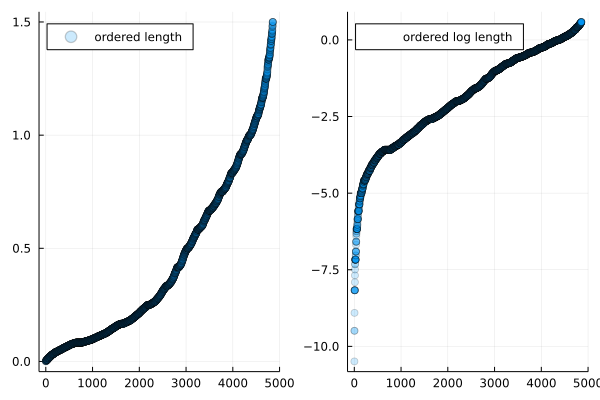

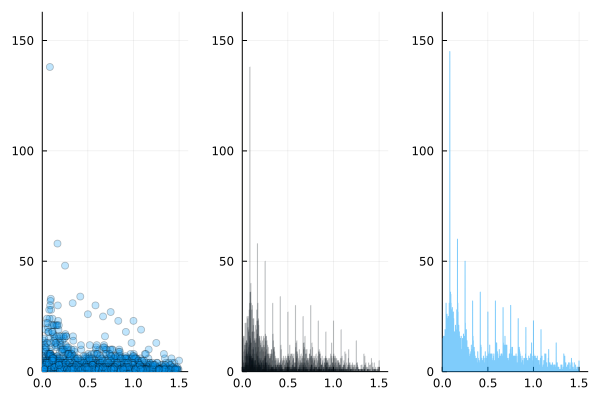

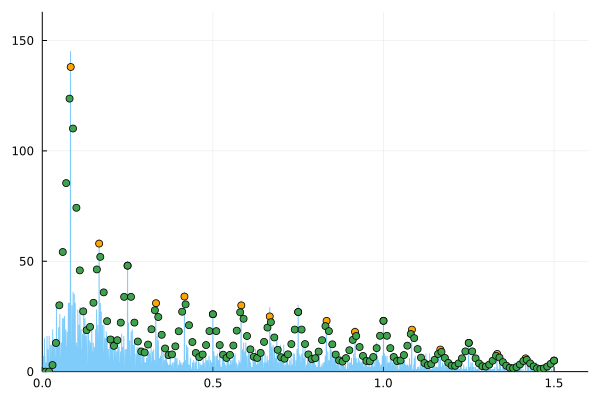

this many seclusions in total:			6320
only looking at first:				1.5 days
in the bar charts each bar covers:		1 minute(s) as set in settings.
...so there are:				2160 slices in graphs i.e. total time div by width of bar.
proportion out by then is about:		76%


In [267]:
analyse_seclusion_durations()

In [243]:
function exp_pdf(x,β)
    y = (1/β)*ℯ^(-x/β)
    return y
end

function demo_exp_pdf()
    limit       = get_limit()
    β           = 1
    xs          = range(0,4,100)
    ys          = map(x -> exp_pdf(x,β),xs)
    exp_pdfg    = scatter(xs, ys, xlims=(0,limit), label="smooth", title="drawing graphs using only beta")
    noisy_pdf   = scatter!(xs, [(y+rand(1)[1]*0.25-0.125) for y in ys], label="noise added")
    return exp_pdfg
end
#exponential_probability_distribution_function = demo_exp_pdf()
#display(exponential_probability_distribution_function)

demo_exp_pdf (generic function with 1 method)

In [240]:
# s9 tests

function test_count_cumulative_fraction()
    cumulative_fraction = count_cumulative_fraction()
    @test typeof(cumulative_fraction) == Float64
    @test -0.01 < cumulative_fraction <= 1.0
    println("passed count cumulative fraction")
end

function test_get_xs()
    xs              = get_xs()
    limit           = get_limit()
    minutes         = limit*24*60
    width_of_hists  = get_width_of_hists()
    n_hists::Int    = minutes/width_of_hists
    @test length(xs) == n_hists
    println("passed get_xs")
end

function test_get_even_odd_review_durations()
    even_odd_review_durations  = get_even_odd_review_durations()
    @test typeof(even_odd_review_durations) == Tuple{Vector{Float64}, Vector{Float64}}
    even_review_durations = even_odd_review_durations[1]
    odd_review_durations  = even_odd_review_durations[2]
    @test mean(.>(even_review_durations, odd_review_durations))==1.0
    println("passed get_even_odd_review_durations")
end

function test_my_poisson()
    xs            = collect(1:20) 
    labda         = 4
    my_scores     = dist_poisson(xs, labda)
    their_pdf     = Poisson(labda)
    their_scores  = [pdf(their_pdf,x) for x in xs]
    @test isapprox(my_scores,their_scores; atol = 1.0e-12)
    println("passed my_poisson")
end

function harry_tests()
    test_count_cumulative_fraction()
    test_get_even_odd_review_durations()
    test_my_poisson()
    test_get_xs()
    println("passed all tests")
end

harry_tests()





passed count cumulative fraction
passed get_even_odd_review_durations


LoadError: UndefVarError: dist_poisson not defined

In [241]:
#=
    xs                  = get_xs()
    even_labda          = get_even_labda()
    even_scale          = 1000
    unscaled_even_ys    = dist_poisson(xs, even_labda)
    even_ys             = .*(unscaled_even_ys, even_scale)
    
    odd_labda           = get_odd_labda()
    odd_scale           = 1000
    unscaled_odd_ys     = dist_poisson(xs, odd_labda)
    odd_ys              = .*(unscaled_odd_ys, odd_scale)
    
    max_x               = maximum(xs)
    c                   = 50
    straight_line       = [c-(c*(x/max_x)) for x in xs]
    println(straight_line)
    
    ys                  = .+(even_ys, odd_ys, straight_line) 
    summed_poisson      = scatter(xs,ys)
    =#

=#

LoadError: syntax: unexpected "="